In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
aisles = pd.read_csv('../data/aisles.csv')
departments = pd.read_csv('../data/departments.csv')
order_products_prior = pd.read_csv('../data/order_products__prior.csv')
order_products_train = pd.read_csv('../data/order_products__train.csv')
orders = pd.read_csv('../data/orders.csv')
products = pd.read_csv('../data/products.csv')

In [47]:
print('departments', departments.shape[0], 'aisles', aisles.shape[0])


departments 21 aisles 134


In [11]:
print(departments.shape)
departments.head(10)

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [23]:
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


/home/subaevdi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


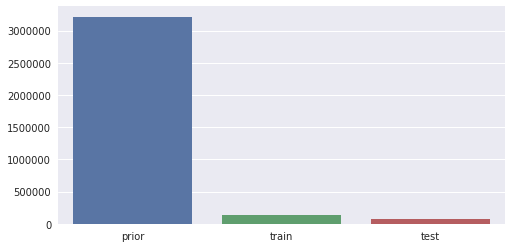

In [54]:
vc = orders.eval_set.value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=vc.index, y=vc.values)

/home/subaevdi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


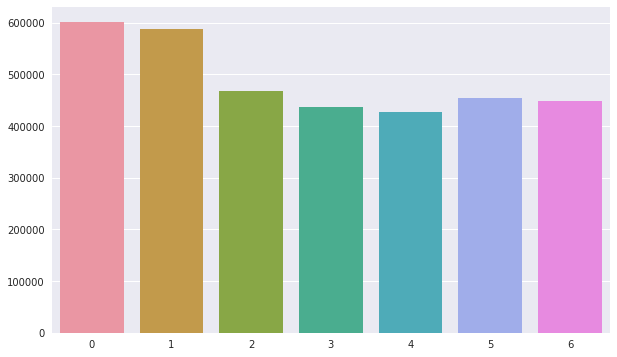

In [51]:
#plt.hist(orders.order_dow, bins=14)

vc = orders.order_dow.value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=vc.index, y=vc.values)

/home/subaevdi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


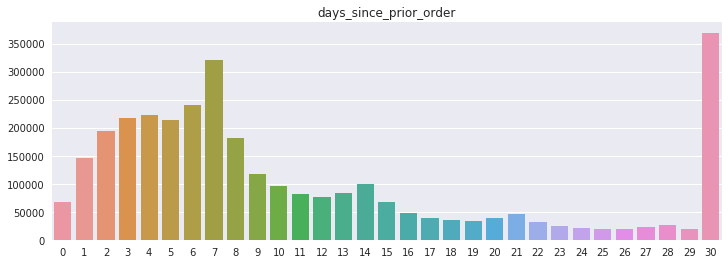

In [61]:
vc = orders.days_since_prior_order.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=vc.index.astype(int), y=vc.values)
plt.title('days_since_prior_order')

/home/subaevdi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


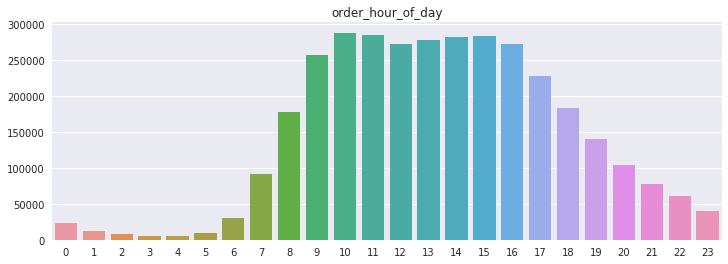

In [60]:
vc = orders.order_hour_of_day.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=vc.index.astype(int), y=vc.values)
plt.title('order_hour_of_day')

,order_id
count,206209.000000
mean,16.590367
std,16.654774
min,4.000000
25%,6.000000
50%,10.000000
75%,20.000000
max,100.000000


/home/subaevdi/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


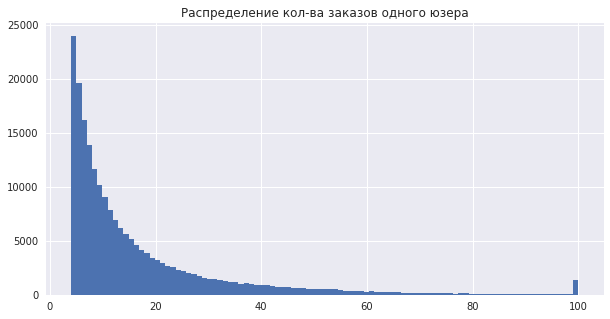

In [49]:
oc = orders[['order_id', 'user_id']].groupby('user_id').count()
plt.figure(figsize=(10,5))
plt.hist(oc.values, bins=100-4+1)
plt.title('Распределение кол-ва заказов одного юзера')
oc.describe()



In [34]:
orders[orders.user_id == 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [44]:
mt = pd.merge(order_products_train[order_products_train.order_id == 1187899], products, on='product_id')
mt = pd.merge(mt, departments, on='department_id'); mt
mt = pd.merge(mt, aisles, on='aisle_id')

mt.drop(['department_id', 'aisle_id', 'order_id'], axis=1).sort_values('add_to_cart_order')

,product_id,add_to_cart_order,reordered,product_name,department,aisle
0,196,1,1,Soda,beverages,soft drinks
2,25133,2,1,Organic String Cheese,dairy eggs,packaged cheese
3,38928,3,1,0% Greek Strained Yogurt,dairy eggs,yogurt
6,26405,4,1,XL Pick-A-Size Paper Towel Rolls,household,paper goods
7,39657,5,1,Milk Chocolate Almonds,snacks,candy chocolate
8,10258,6,1,Pistachios,snacks,nuts seeds dried fruit
10,13032,7,1,Cinnamon Toast Crunch,breakfast,cereal
9,26088,8,1,Aged White Cheddar Popcorn,snacks,popcorn jerky
4,27845,9,0,Organic Whole Milk,dairy eggs,milk
5,49235,10,1,Organic Half & Half,dairy eggs,cream


In [26]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [27]:
print(order_products_prior.shape, order_products_train.shape)
order_products_prior.head()

(32434489, 4) (1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [19]:
order_products_train.columns, order_products_prior.columns

(Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object'),
 Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object'))

In [62]:
order_products_train.tail()

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1
